In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

In [20]:
df = pd.DataFrame({'task': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
                  'team': ['R&D', 'Accounting', 'Sales', 'Sales', 'IT', 'R&D', 'IT', 'Sales', 'Accounting', 'Accounting', 'Sales', 'IT'],
                  'start': pd.to_datetime(['20 Oct 2022', '24 Oct 2022', '26 Oct 2022', '31 Oct 2022', '3 Nov 2022', '7 Nov 2022', '10 Nov 2022', '14 Nov 2022', '18 Nov 2022', '23 Nov 2022', '28 Nov 2022', '30 Nov 2022']),
                  'end': pd.to_datetime(['31 Oct 2022', '28 Oct 2022', '31 Oct 2022', '8 Nov 2022', '9 Nov 2022', '18 Nov 2022', '17 Nov 2022', '22 Nov 2022', '23 Nov 2022', '1 Dec 2022', '5 Dec 2022', '5 Dec 2022']),
                  'completion_frac': [1, 1, 1, 1, 1, 0.95, 0.7, 0.35, 0.1, 0, 0, 0]})
print(df)

   task        team      start        end  completion_frac
0     A         R&D 2022-10-20 2022-10-31             1.00
1     B  Accounting 2022-10-24 2022-10-28             1.00
2     C       Sales 2022-10-26 2022-10-31             1.00
3     D       Sales 2022-10-31 2022-11-08             1.00
4     E          IT 2022-11-03 2022-11-09             1.00
5     F         R&D 2022-11-07 2022-11-18             0.95
6     G          IT 2022-11-10 2022-11-17             0.70
7     H       Sales 2022-11-14 2022-11-22             0.35
8     I  Accounting 2022-11-18 2022-11-23             0.10
9     J  Accounting 2022-11-23 2022-12-01             0.00
10    K       Sales 2022-11-28 2022-12-05             0.00
11    L          IT 2022-11-30 2022-12-05             0.00


In [21]:
df['days_to_start'] = (df['start'] - df['start'].min()).dt.days
df['days_to_end'] = (df['end'] - df['start'].min()).dt.days
df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1  # to include also the end date
df['completion_days'] = df['completion_frac'] * df['task_duration']

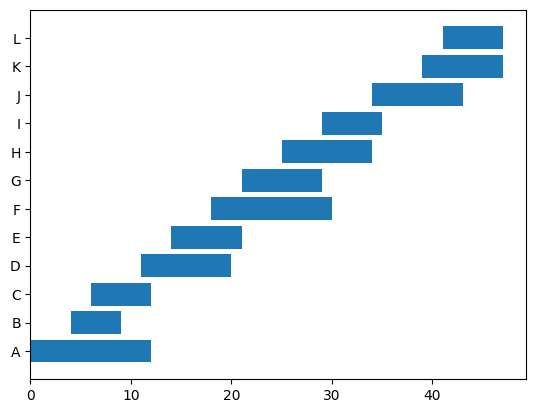

In [22]:
plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'])
plt.show()

In [23]:
# 1
df2 = df[df['team']=='Sales'][['task', 'team', 'start', 'end']]

# 2
df2.rename(columns={'start': 'start_1', 'end': 'end_1'}, inplace=True)
df2.reset_index(drop=True, inplace=True)

# 3
df2['start_2'] = pd.to_datetime([None, '10 Nov 2022', '25 Nov 2022', None])
df2['end_2'] = pd.to_datetime([None, '14 Nov 2022', '28 Nov 2022', None])
df2['start_3'] = pd.to_datetime([None, None, '1 Dec 2022', None])
df2['end_3'] = pd.to_datetime([None, None, '5 Dec 2022', None])

# 4
for i in [1, 2, 3]:
    suffix = '_' + str(i)
    df2['days_to_start' + suffix] = (df2['start' + suffix] - df2['start_1'].min()).dt.days
    df2['days_to_end' + suffix] = (df2['end' + suffix] - df2['start_1'].min()).dt.days
    df2['task_duration' + suffix] = df2['days_to_end' + suffix] - df2['days_to_start' + suffix] + 1


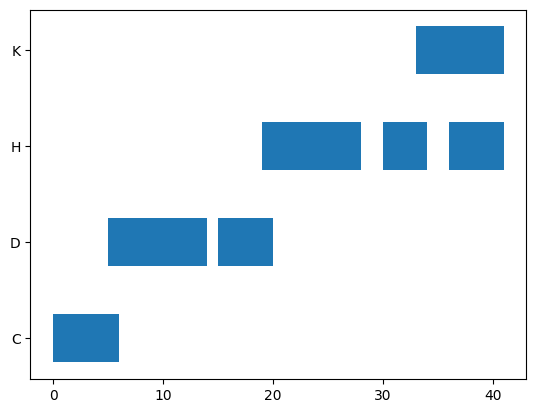

In [24]:
# 1
fig, ax = plt.subplots()

# 2
for index, row in df2.iterrows():
    if row['start_2'] is None:
        ax.barh(y=df2['task'], width=df2['task_duration_1'], left=df2['days_to_start_1'])
    elif row['start_2'] is not None and row['start_3'] is None:
        ax.broken_barh(xranges=[(row['days_to_start_1'], row['task_duration_1']), (row['days_to_start_2'], row['task_duration_2'])], yrange=(index + 1, 0.5))
    else:
        ax.broken_barh(xranges=[(row['days_to_start_1'], row['task_duration_1']), (row['days_to_start_2'], row['task_duration_2']), (row['days_to_start_3'], row['task_duration_3'])], yrange=(index + 1, 0.5))

# 3
ax.set_yticks([1.25, 2.25, 3.25, 4.25])
ax.set_yticklabels(df2['task'])

plt.show()

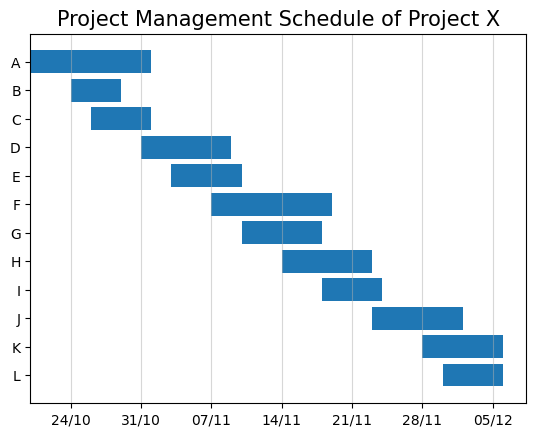

In [25]:
# 1
fig, ax = plt.subplots()

plt.barh(y=df['task'], width=df['task_duration'], left=df['days_to_start'] + 1)
plt.title('Project Management Schedule of Project X', fontsize=15)

# 2
plt.gca().invert_yaxis()

# 3
xticks = np.arange(5, df['days_to_end'].max() + 2, 7)

# 4
xticklabels = pd.date_range(start=df['start'].min() + dt.timedelta(days=4), end=df['end'].max()).strftime("%d/%m")
# 5
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])

# 6
ax.xaxis.grid(True, alpha=0.5)

plt.show()

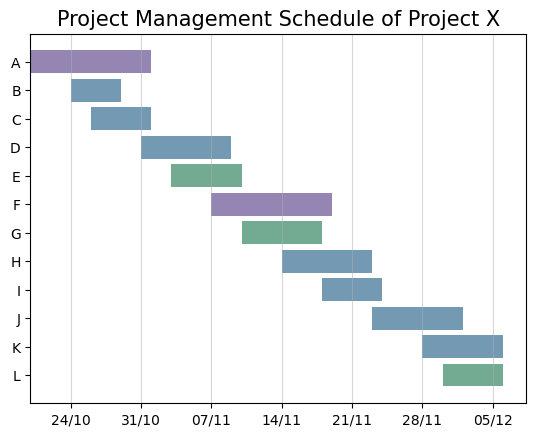

In [48]:
# Specify in hex codes
grey = [.7, .7, .7]
blue = np.array([0, 0.4470, 0.7410]) * 255
red = np.array([0.8500, 0.3250, 0.0980]) * 255

team_colors = {'R&D': '#9485B3', 
               'Accounting': '#7399B3', 
               'Sales': "#7399B3", 
               'IT': '#73AA92'}

# 2
fig, ax = plt.subplots()

# 3
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']])

# 4
plt.title('Project Management Schedule of Project X', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)
plt.show()

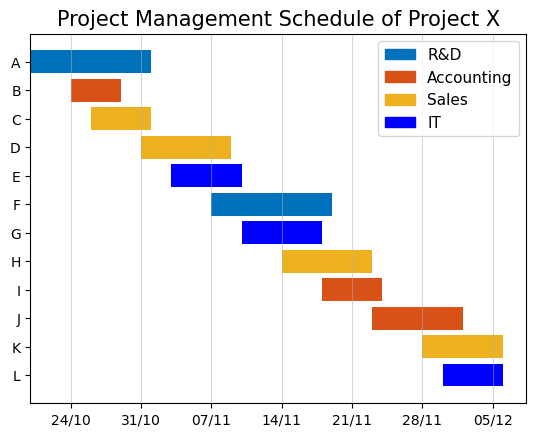

In [43]:
patches = []
for team in team_colors:
    patches.append(matplotlib.patches.Patch(color=team_colors[team]))
    
fig, ax = plt.subplots()
for index, row in df.iterrows():
    plt.barh(y=row['task'], width=row['task_duration'], left=row['days_to_start'] + 1, color=team_colors[row['team']])
plt.title('Project Management Schedule of Project X', fontsize=15)
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[::7])
ax.xaxis.grid(True, alpha=0.5)

# Adding a legend
ax.legend(handles=patches, labels=team_colors.keys(), fontsize=11)

plt.show()